# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


### Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import math
import json


from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, MinMaxScaler
import seaborn as sns #For Data visualization
import matplotlib.pyplot as plt #Data plotting and visualization
sns.set_palette(sns.color_palette('Set2'))
import plotly.express as px
%matplotlib inline


from datetime import datetime
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.cluster import KMeans

# Data Wrangling

Steps in Data Wrangling:
* Data Loading
* Data Exploration
* Data Structuring
* Data Cleaning
* Data Publishing

## Data Loading

In [81]:
# Importing the data from json file

portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)

profile = pd.read_json('data/profile.json', orient='records', lines=True)

transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Data Exploration

Prilimainary exploration of the raw data from the json file. 

### Portfolio Data


**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [84]:
#Glimpse of Portfolio data
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [85]:
#Info of portfolio data
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [87]:
#Discription of Protfolio Data
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [100]:
#Duplicat eand Null values check

print('No of Duplicate values =',portfolio['id'].duplicated().sum())
print('\n')
print('No of Null values\n\n', portfolio.isna().sum())

No of Duplicate values = 0


No of Null values

 reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64


In [ ]:
## Profile Data

### Profile Data

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income


In [103]:
#Glimpse of Profile data
profile.sample(10)

,gender,age,id,became_member_on,income
16523,F,50,5f102735c1ca4dffb40d7c34631d4ad5,20171030,105000.0
6307,None,118,d9952c05f5e045b5ae01147bf905bb51,20171004,NaN
2455,None,118,ccfd44eac85a466abbd7881b302b68ea,20160727,NaN
3139,None,118,676ee3fbf66b46078484ecaa99bc8d1a,20151122,NaN
9175,M,57,c7465dc15a4249acbd6a7bc688896e4b,20151205,73000.0
6978,F,44,8ce65a3b2b79468980312b5a61b77e29,20180329,83000.0
16730,M,73,857ae53b4f1f4461b2001ed57673f984,20171024,33000.0
9205,None,118,092e0c1da23a48f3bc18627d390e83d5,20161222,NaN
15621,None,118,34302ff0fcf8450eb335db6e878080db,20160427,NaN
14930,F,55,6e51792cc50a4df3be356d38cbe5d692,20151003,118000.0


In [105]:
#Info of Profile data
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [172]:
#Discription of Profile Data
profile.describe()


,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


<AxesSubplot:xlabel='age'>

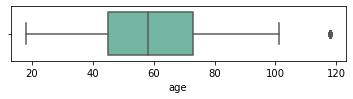

In [174]:
#Box plot for age distribution

plt.figure(figsize=[6,1])
sns.boxplot(data=profile, x='age')

There seems to be few very haigh values for age(eg: 118 yrs). This is  likely to be an erronious data. 

In [127]:
#Duplicate and Null values check


print('No of Duplicate values =',profile['id'].duplicated().sum())
print('\n')
print('No of Null values\n\n', profile.isna().sum())
print('\n')
# Checking percentage of null values
print('\nPercentage of missing data: ', round((profile.gender.isna().sum()*100 / profile.shape[0]),2),'%')


No of Duplicate values = 0


No of Null values

 gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64



Percentage of missing data:  12.79 %


<AxesSubplot:>

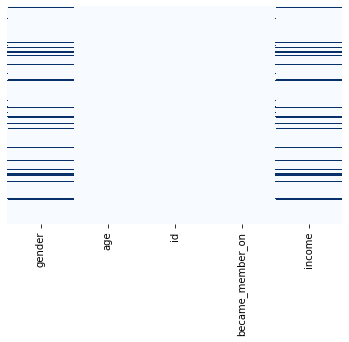

In [130]:

# Visualize Missing Data
sns.heatmap(profile.isnull(), yticklabels = False, cbar = False, cmap="Blues")


### Transcript Data

**transcript.json**

* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


In [132]:
#Glimpse of Profile data
transcript.sample(10)

,person,event,value,time
95761,cf9c65efdfcd479dae3bb780f4b4ab49,transaction,{'amount': 2.62},252
293111,d5d487cfdc5b456b84b7881ad5d3640b,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,654
227884,8c410d84af08408fb41f953c93ffac27,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,528
169337,5ff23c5696454a21a6284d9ce9ae8234,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,414
57230,8109d451a16e4e2690383f084e575a57,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},168
10400,2332714b1fb54741b3a7b27f259dc994,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
190644,feed77a618d24d6dbd22913fc6601803,transaction,{'amount': 16.42},462
252222,61734abecbcf4018a4003af9adffdb27,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},576
242351,cccc28cea9bf4b1f94bd032402c66438,transaction,{'amount': 6.46},564
186539,83e65dfdda80471991a6f1fa12c76b19,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},450


In [133]:
#Info of Profile data
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [134]:
#Discription of Profile Data
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [136]:
#Null values check

print('No of Null values\n\n', transcript.isna().sum())
print('\n')



No of Null values

 person    0
event     0
value     0
time      0
dtype: int64




## Data Structuring

### Portfolio

* 'Channels' colum is in the form of list.
* Rename column name to make it consistant actoss all datasets.
* Create a column offer_name, assign a recogonizable identifyer


In [137]:
def rename_cols(df, new_col_names):
    """
    INPUT
    ----------
    df: input dataframe for renaming columns
    new_col_names: define new column name for each column
    
    OUTPUT
    -------
    df: output data frame with renamed column names
       
    """

    df= df.rename(columns = new_col_names)
    return df

In [148]:
def clean_portfolio(portfolio=portfolio):
    '''
    INPUT:
    portfolio - (pandas dataframe), portfolio data
    
    OUTPUT:
    portfolio - (pandas dataframe), cleaned portfolio data

    
    Description:
    This function cleans the dat and provides a DatFrame with Offer ID and other data about the offer. 
    '''    
    new_col_names_portfolio = {'difficulty':'offer_difficulty' , 'id':'offer_id', 
                 'duration':'offer_duration', 'reward': 'offer_reward'}
    portfolio  = rename_cols(portfolio, new_col_names_portfolio )
    
    
    #Create new column Offer name to assign a recogonizable identifyer for each of the 10 offers. 
    new_col = {'offer_name' : ['offer_1', 'offer_2','offer_3','offer_4',
                              'offer_5','offer_6','offer_7','offer_8','offer_9','offer_10' ]}
    portfolio['offer_name'] = pd.DataFrame(new_col)
    
    # One hot encode the 'offertype' column
    #offertype = pd.get_dummies(portfolio['offer_type'])
    
    # One hot encode the 'channels' columns
    mlb = MultiLabelBinarizer()
    mlb_fit = mlb.fit(portfolio['channels'])
    channels_df = pd.DataFrame(mlb_fit.transform(portfolio['channels']),columns=mlb_fit.classes_)
    
    #Drop the old 'channels'
    portfolio = portfolio.drop(columns=['channels'])
    
    #Replace the 'offertype' and 'channels' columns
    portfolio = pd.concat([portfolio, channels_df], axis=1)
    
    
    #Reorder the columns order
    #portfolio = portfolio[[ 'offer_id','offer_difficulty','offer_duration','offer_reward','bogo','discount',
    #                        'informational','email','mobile','social','web']]

    return portfolio

In [149]:
#Checking the data


portfolio_df = clean_portfolio(portfolio)
#portfolio_df = portfolio_df[['offer_reward', 'channels', 'offer_difficulty', 
                             #'offer_duration', 'offer_type', 'offer_id', 'offer_name']]
    
portfolio_df

,offer_reward,offer_difficulty,offer_duration,offer_type,offer_id,offer_name,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,offer_1,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,offer_3,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_5,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_6,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,offer_7,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,offer_8,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,offer_9,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,offer_10,1,1,0,1


### Profile 


* Rename 'id', 'income' column.
* Remove rows wth no 'income' data. 
* Encode 'gender' data. 
* Change datatype of 'became_member_on' column datatime.
* Grouup the age into age ranges. 
* Encode the age ranges. 


In [ ]:
def clean_profile(profile = profile):

        '''
    INPUT:
    profile - (pandas dataframe), profile data
    
    OUTPUT:
    portfolio - (pandas dataframe), cleaned profile data

    
    Description:
    This function cleans the data and provides a DatFrame with cleaned profile data. 
    '''    
        
    #rename profile columns
    new_col_profile = {'id':'customer_id' , 'income':'customer_income'}
    profile = rename_cols(profile, new_col_profile )
    
    #Removed those with no income data
    profile = profile[profile['customer_income'].notnull()]
    
    
    #Removed customer with unspecified Gender
    #profile = profile[profile['gender'] != 'O']
    profile = profile.reset_index(drop=True)
    
    binarizerobj = LabelBinarizer()
    profile['gender'] = binarizerobj.fit_transform(profile['gender'])
    
    gender_integer_map = {}
    for i in binarizerobj.classes_:
        gender_integer_map[i] = binarizerobj.transform([i])[0,0]
        
        
    
    #Change datetype of bacame_member_on column
    profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format = '%Y%m%d')   
    #Encode the year values
    profile['membership_year'] = profile['became_member_on'].apply(lambda elem: elem.year)
    membership_year_df = pd.get_dummies(profile['membership_year'])
    
    
    #Group the age ranges
    labels = ['GenZ(18–25)', 'Millennias(26-43)', 'GenXers(44-56)',
                            'Boomers(57-75)', 'Matures(76+)']
    profile['age_group'] = pd.cut(profile['age'], bins=[18, 26, 44, 57, 76, 101] , 
                                  labels=labels, include_lowest=True)
    
    # Encode for Age ranges
    agerange_df = pd.get_dummies(profile['age_group'])
    
    
    # Appened all the encoded variables to the main dataframe
    profile = pd.concat([profile,
                         agerange_df,
                         membership_year_df], axis=1)

    
    # Drop depcreated columns
    '''profile = profile.drop(columns=['age',
                                    'age_group',
                                    'became_member_on',
                                    'membership_year'])'''
    return profile
profile_df = clean_profile(profile)
profile_df = profile_df[['gender','age', 'customer_id','became_member_on',
            'customer_income','membership_year','age_group']]

In [156]:
profile_df.sample(5)

,gender,age,customer_id,became_member_on,customer_income,membership_year,age_group
6864,F,58,8d87b4721b494123b655374a403a75ed,2018-04-28,41000.0,2018,Boomers(57-75)
6854,M,49,1342d779e7594c899f9ce936e55790d7,2016-12-23,32000.0,2016,GenXers(44-56)
5899,M,26,a32052af10d14dceb5c818f6d712da3c,2016-11-24,74000.0,2016,GenZ(18–25)
6177,F,31,b4c4cb0440c4420baa94cfcffe6d7390,2018-05-08,45000.0,2018,Millennias(26-43)
13198,F,83,5956a3014010475fb534b5939fd1c0ff,2016-06-18,96000.0,2016,Matures(76+)


### Transcript:


* Rename 'person', 'offerid' columns. 
* Remove customer ids that are not in 'Profile' data. 
* Convert hours to days and rename the 'time' column to 'time_in_days'
* Extract 'offer_id' and -amount' details from the 'value' column and store them in separate columns.
* Create 2 data frames one with Transaction data and another with offer data.

In [150]:
def clean_transcript(transcript =transcript):
    
    # Rename Transcript columns
    new_col_transcript = {'person': 'customer_id' , 'offerid' : 'offer_id' }
    transcript = rename_cols(transcript, new_col_transcript)

    
    # Remove customer id's that are not in the customer profile DataFrame
    select_data = transcript['customer_id'].isin(profile['id'])
    transcript = transcript[select_data]
    
    # Convert from hours to days
    transcript['time'] = transcript['time'] // 24   
    
    # Change'person' column name to 'customer_id'
    transcript = transcript.rename(columns={'time': 'time_in_days'})
    
    transcript['offer_id'] =\
        transcript['value'].apply(lambda elem: list(elem.values())[0])
    
    #Create seperate Dataframes for Offers and Transactions
    
    #1.Create Dataframe for Transactions
    transactions = transcript[transcript['event']=='transaction'].drop(['value'], axis =1)
    transactions = transactions.rename(columns={'offer_id': 'amount'})
    
    
    # One hot encode customer offer events
    transcript = transcript[transcript['event'].isin(['offer received' , 
                                                      'offer completed', 'offer viewed' ])].drop(['value'], axis =1)
    event_df = pd.get_dummies(transcript['event'])
    
    #2.Create Dataframe for offers

    offers = pd.concat([transcript,event_df], axis =1)
    offers  = offers.rename(columns={'offer completed': 'completed','offer received':'received' , 'offer viewed': 'viewed'})
    #offers = offers[['offer_id','customer_id', 'time_in_days', 'completed',
           #'received', 'viewed']]
    
    return offers,transactions 
offers_df,transactions_df  = clean_transcript(transcript)

In [159]:
offers_df.sample(5)

,customer_id,event,time_in_days,offer_id
207847,8feb7b4289bd4515a2ee2c9bd0aed75c,offer received,21,3f207df678b143eea3cee63160fa8bed
215605,47b014746315472f8127c2031441506e,offer viewed,21,4d5c57ea9a6940dd891ad53e9dbe8da0
8750,ee131d9539e44c4aa22d218213089281,offer received,0,2906b810c7d4411798c6938adc9daaa5
243932,44ee7090baf5466aa816d356fa832b73,offer completed,23,9b98b8c7a33c4b65b9aebfe6a799e6d9
184350,a118079090144aec9dd4ddb957a5ede5,offer completed,18,ae264e3637204a6fb9bb56bc8210ddfd


In [160]:
transactions_df.sample(5)

,customer_id,event,time_in_days,amount
195959,905c7b26eac2451b9b1f0ebc7be8b9fd,transaction,20,414.18
134998,ca1fbde7bf6a41a4a4ea9cea66a72e37,transaction,14,24.46
186681,0f6ff347c72c45ecb8a10010061419cb,transaction,18,3.1
302389,9b57b7bc4ea24fc1a3d2f4760a141941,transaction,29,1.3
226803,6cac9ac049e84da5a6172f82b92a00a7,transaction,21,26.88


## Portfolio: Data Analysis

In [161]:
display(portfolio_df)

,offer_reward,offer_difficulty,offer_duration,offer_type,offer_id,offer_name,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,offer_1,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,offer_3,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_5,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_6,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,offer_7,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,offer_8,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,offer_9,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,offer_10,1,1,0,1


In [162]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   offer_reward      10 non-null     int64 
 1   offer_difficulty  10 non-null     int64 
 2   offer_duration    10 non-null     int64 
 3   offer_type        10 non-null     object
 4   offer_id          10 non-null     object
 5   offer_name        10 non-null     object
 6   email             10 non-null     int32 
 7   mobile            10 non-null     int32 
 8   social            10 non-null     int32 
 9   web               10 non-null     int32 
dtypes: int32(4), int64(3), object(3)
memory usage: 768.0+ bytes


In [165]:
portfolio_df['offer_type'].value_counts()

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

## Profile: Data Exploration

In [166]:
display(profile_df)

,gender,age,customer_id,became_member_on,customer_income,membership_year,age_group
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,GenXers(44-56)
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,Boomers(57-75)
2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,Boomers(57-75)
3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,Boomers(57-75)
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,Boomers(57-75)
...,...,...,...,...,...,...,...
14820,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,2018,GenXers(44-56)
14821,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,2018,Boomers(57-75)
14822,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,2017,GenXers(44-56)
14823,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,2016,Matures(76+)


In [18]:
print(pd.DataFrame(profile_df['age'].describe()))
print('')
print(pd.DataFrame(profile_df['customer_income'].describe()))

                age
count  14825.000000
mean      54.393524
std       17.383705
min       18.000000
25%       42.000000
50%       55.000000
75%       66.000000
max      101.000000

       customer_income
count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000


In [20]:
profile_df = profile_df[profile_df['customer_income'].notnull()]
print(profile_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 0 to 14824
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   customer_id       14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   customer_income   14825 non-null  float64       
 5   membership_year   14825 non-null  int64         
 6   age_group         14825 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 825.4+ KB
None


Median Age  : $ 55.0


Text(0.5, 1.0, 'Age Distribution')

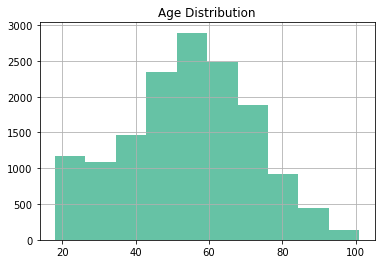

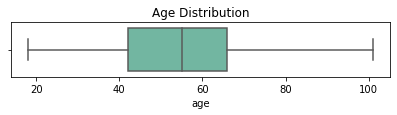

In [21]:
# Age Distributiobn:Histogram

profile_df['age'].hist(bins=10)

plt.title('Age Distribution')

#Age distribution: Box Plot

print("Median Age  : $",profile_df['age'].median())


plt.figure(figsize=[6.8,1])
sns.boxplot(data=profile_df, x='age')
plt.title('Age Distribution')

Code Age in terms of Generation criteria:
- Gen Z: 18 – 25
- Millennials: 26 – 43
- Gen Xers: 44 – 56
- Boomers: 57 – 75
- Matures: 76+ ]


In [79]:
profile_df['age_group'].value_counts()

Boomers(57-75)       5147
GenXers(44-56)       4058
Millennias(26-43)    2956
Matures(76+)         1495
GenZ(18–25)          1169
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Customer Age group')

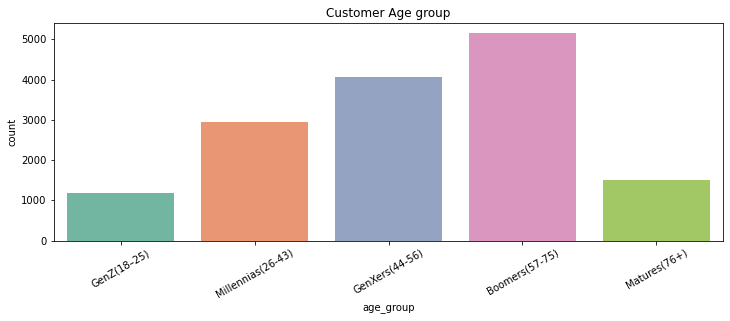

In [175]:
#Group the age ranges

fig = plt.figure(figsize = (12,4))
sns.countplot(x='age_group',data=profile_df)
plt.xticks(rotation=30)
plt.title('Customer Age group')


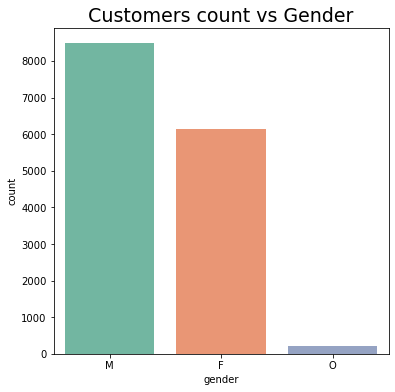

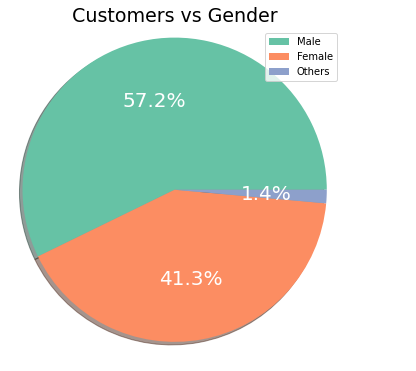

In [188]:
#Gender distribution

plt.figure(figsize=[6,6])
sns.countplot(x= profile_df['gender'], order = profile_df['gender'].value_counts().index)

plt.title('Customers count vs Gender', fontsize=19)

#Gender Distribution in Percentage

gender = profile_df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender, labels=['Male', 'Female' , 'Others'], shadow=True, autopct='%1.1f%%', 
            textprops={'color': "w", 'fontsize': 20})

plt.axis('equal')
plt.title('Customers vs Gender', fontsize=19)
plt.legend(loc='best')

In [24]:
gender

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [25]:
#Analyze income:

profile_df['customer_income'].describe()


count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: customer_income, dtype: float64

Text(0.5, 0, 'Salary(USD)')

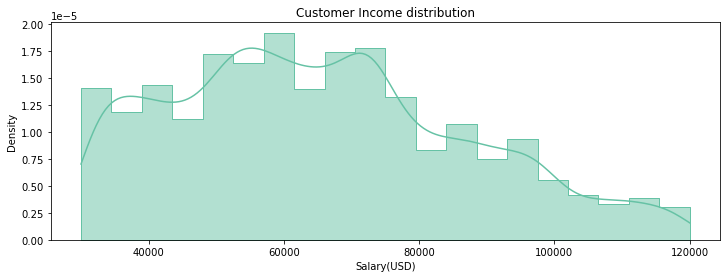

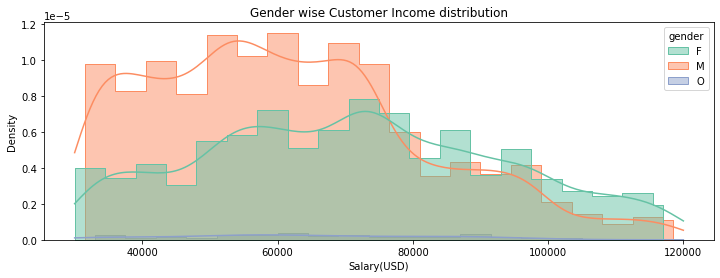

In [189]:
#Income distribution

plt.figure(figsize=[12,4])
sal_hist1 = sns.histplot(data = profile_df, x = 'customer_income',  multiple = "dodge",element = 'step', 
                        bins = 20, kde = True ,stat = 'density' ).set_title("Customer Income distribution")
plt.xlabel("Salary(USD)")

#Income distribution by gender

plt.figure(figsize=[12,4])
sal_hist = sns.histplot(data = profile_df, x = 'customer_income', hue = 'gender', 
                        multiple = "dodge",element = 'step', bins = 20, kde = True ,stat = 'density' ).set_title("Gender wise Customer Income distribution")
plt.xlabel("Salary(USD)")

In [200]:
#Median Income

print("Median Income  : $",profile_df['customer_income'].median())
print("Maximum Income : $",profile_df['customer_income'].max())
print("Maximum Income : $",profile_df['customer_income'].min())

print("Median Income for Males  : $",profile_df[profile_df['gender']=='M']['customer_income'].median())

print("Median Income Females : $",profile_df[profile_df['gender']=='F']['customer_income'].median())



Median Income  : $ 64000.0
Maximum Income : $ 120000.0
Maximum Income : $ 30000.0
Median Income for Males  : $ 59000.0
Median Income Females : $ 71000.0


In [28]:
#profile_df['became_member_on'] = pd.to_datetime(profile['became_member_on'], format = '%Y%m%d') 

Text(0, 0.5, 'Number of Customers or Test Subjects')

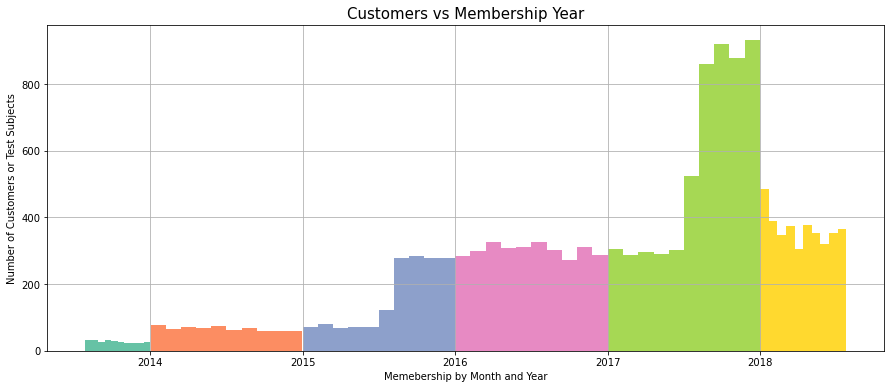

In [190]:
# membership by year of joining

plt.figure(figsize=(15, 6))
profile_df['became_member_on'].groupby(profile_df['became_member_on'].dt.year).hist(bins=10)
plt.title('Customers vs Membership Year', fontsize=15)
plt.xlabel('Memebership by Month and Year')
plt.ylabel('Number of Customers or Test Subjects')

In [197]:
profile_df['became_member_on'].groupby(profile_df['became_member_on'].dt.year)
profile_df['became_member_on'].min()

Timestamp('2013-07-29 00:00:00')

In [198]:
profile_df['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

## Transcript: Data Exploration

In [178]:
#Seperatng transaction and offer data from transcript dataframe

offers_df, transactions_df = clean_transcript(transcript)

In [182]:
#Offer Data
offers_df.sample(10)

,customer_id,event,time_in_days,offer_id,completed,received,viewed
286103,f5bab1d29685425d9ac6ce00c0d0b123,offer completed,26,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0
101403,281c7fdffd2b4b3eb4662a3b0039b197,offer completed,11,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0
155940,0785f1fce0b04ba08e01c7d2ebab4917,offer received,17,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0
103980,a72733b3057644809e9db04b7eb8c986,offer completed,12,2906b810c7d4411798c6938adc9daaa5,1,0,0
122866,05aca359cfb04309a05362db256954ae,offer received,14,5a8bc65990b245e5a138643cd4eb9837,0,1,0
11816,938db8510d784474b1229747751ff27c,offer received,0,ae264e3637204a6fb9bb56bc8210ddfd,0,1,0
288070,f168dfeb0f904c369419f5927e15bb0e,offer completed,26,2298d6c36e964ae4a3e7e9706d1fb8c2,1,0,0
183049,996fb8e62375461f8f6ca0cf7d2eeaa3,offer completed,18,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0
58498,7cb8642dbbd34261babbce3da1ab8e33,offer received,7,ae264e3637204a6fb9bb56bc8210ddfd,0,1,0
12110,f8f608c3227a4398bad5dc1b6b692578,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,1,0


In [183]:
#Transactions Data
transactions_df.sample(10)

,customer_id,event,time_in_days,amount
168646,bb9e58e712404f8caa0105bbae0c6edb,transaction,17,0.89
26054,4f17683973c440d6a4775e796ed14dd3,transaction,1,19.08
286898,f1d381a167414e6790fa19abea39d9e8,transaction,26,19.33
48213,a2c2d33befb94372833451fdd0820148,transaction,5,3.09
36889,3a1cca6c614e4541b8b7478afbb72ac9,transaction,3,6.21
110545,a87dd5ea878444f08ab557b145c5377c,transaction,13,20.94
259641,4e3fa85725f141f6b4bf3bae3a485986,transaction,24,3.79
303425,82b13a64bcba4a59a11d5323f9e04134,transaction,29,8.69
199539,c86f6d63ebfe40f388040037a16255da,transaction,20,13.07
132738,677605ce51a948d4ba74fa54229119e4,transaction,14,0.51


In [32]:

offers_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167581 entries, 0 to 306527
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   167581 non-null  object
 1   event         167581 non-null  object
 2   time_in_days  167581 non-null  int64 
 3   offer_id      167581 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.4+ MB


In [33]:

transactions_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   138953 non-null  object
 1   event         138953 non-null  object
 2   time_in_days  138953 non-null  int64 
 3   amount        138953 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.3+ MB


In [34]:
offers_type = pd.merge(offers_df, portfolio_df, left_on='offer_id', right_on='offer_id', how='inner')
offers_type.head(2)

,customer_id,event,time_in_days,offer_id,offer_reward,channels,offer_difficulty,offer_duration,offer_type,offer_name
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo,offer_4
1,ebe7ef46ea6f4963a7dd49f501b26779,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo,offer_4


In [35]:
data_all = pd.merge(offers_type, profile_df, left_on='customer_id', right_on='customer_id', how='inner')
data_all.head(2)

,customer_id,event,time_in_days,offer_id,offer_reward,channels,offer_difficulty,offer_duration,offer_type,offer_name,gender,age,became_member_on,customer_income,membership_year,age_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo,offer_4,F,75,2017-05-09,100000.0,2017,Boomers(57-75)
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo,offer_4,F,75,2017-05-09,100000.0,2017,Boomers(57-75)


<AxesSubplot:title={'center':'Informational'}, ylabel='Count'>

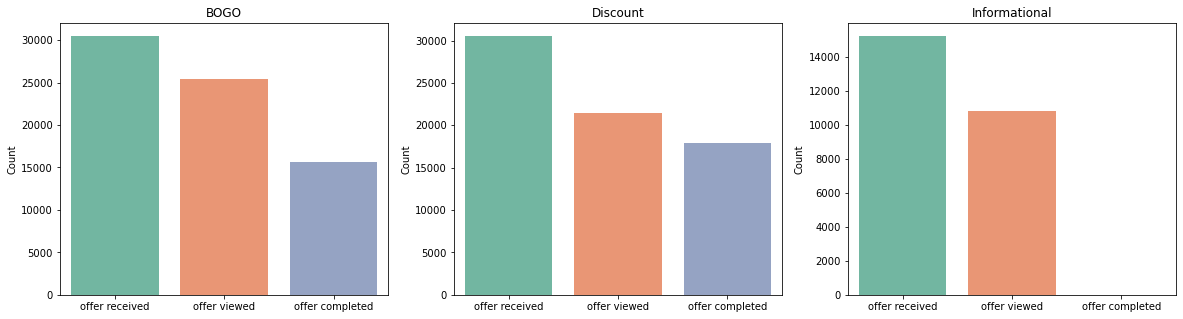

In [184]:
#Comparing offer recieved, viewed, completed by offer type

def offer_conversion_rate(offers_type):
    
    df_graph = offers_type.groupby(['event', 'offer_type'])['customer_id'].count().reset_index()
    df_graph['event'] = pd.Categorical(df_graph['event'], ["offer received", "offer viewed", "offer completed"])

    df_graph.sort_values('event', inplace = True)
    df_graph = df_graph.rename(columns = {'customer_id':'customer_count'})

    df_graph.sort_values('event', inplace=True)

    fig, axs = plt.subplots(ncols=3, figsize=(20, 5))

    sns.set_palette(sns.color_palette('Set2'))

    ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "bogo"'),ax=axs[0])
    ax.set(xlabel='', ylabel='Count', title='BOGO')

    ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "discount"'),ax=axs[1])
    ax.set(xlabel='', ylabel='Count', title='Discount')

    ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "informational"'), ax=axs[2])
    ax.set(xlabel='', ylabel='Count', title='Informational')
    
    return ax

offer_conversion_rate(offers_type)